In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score

In [3]:
import pandas as pd
df=pd.read_csv("abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

### Attribute informaion

In [6]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

From this we can see that there is no null value in the dataset and we can also plot a heatmap for this.

<AxesSubplot:>

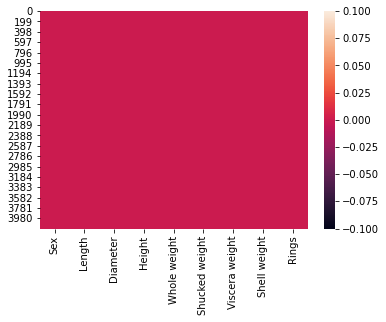

In [7]:
sns.heatmap(df.isnull())

# EDA

In [8]:
df["Rings"].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

By analysing this we can see that our target variable is having 1 to 29 rings on the abalone.

<AxesSubplot:xlabel='Rings', ylabel='Density'>

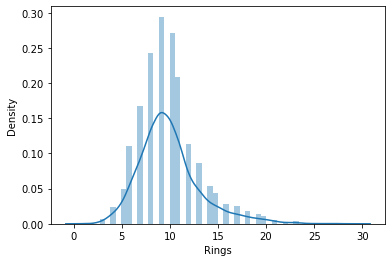

In [9]:
sns.distplot(df["Rings"])

<AxesSubplot:xlabel='Sex', ylabel='count'>

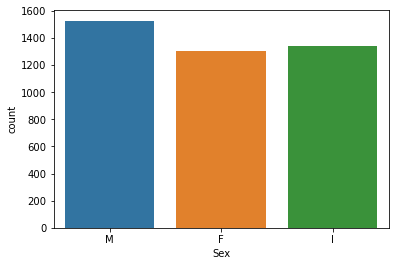

In [10]:
sns.countplot(df["Sex"])

The data is not imbalanced.

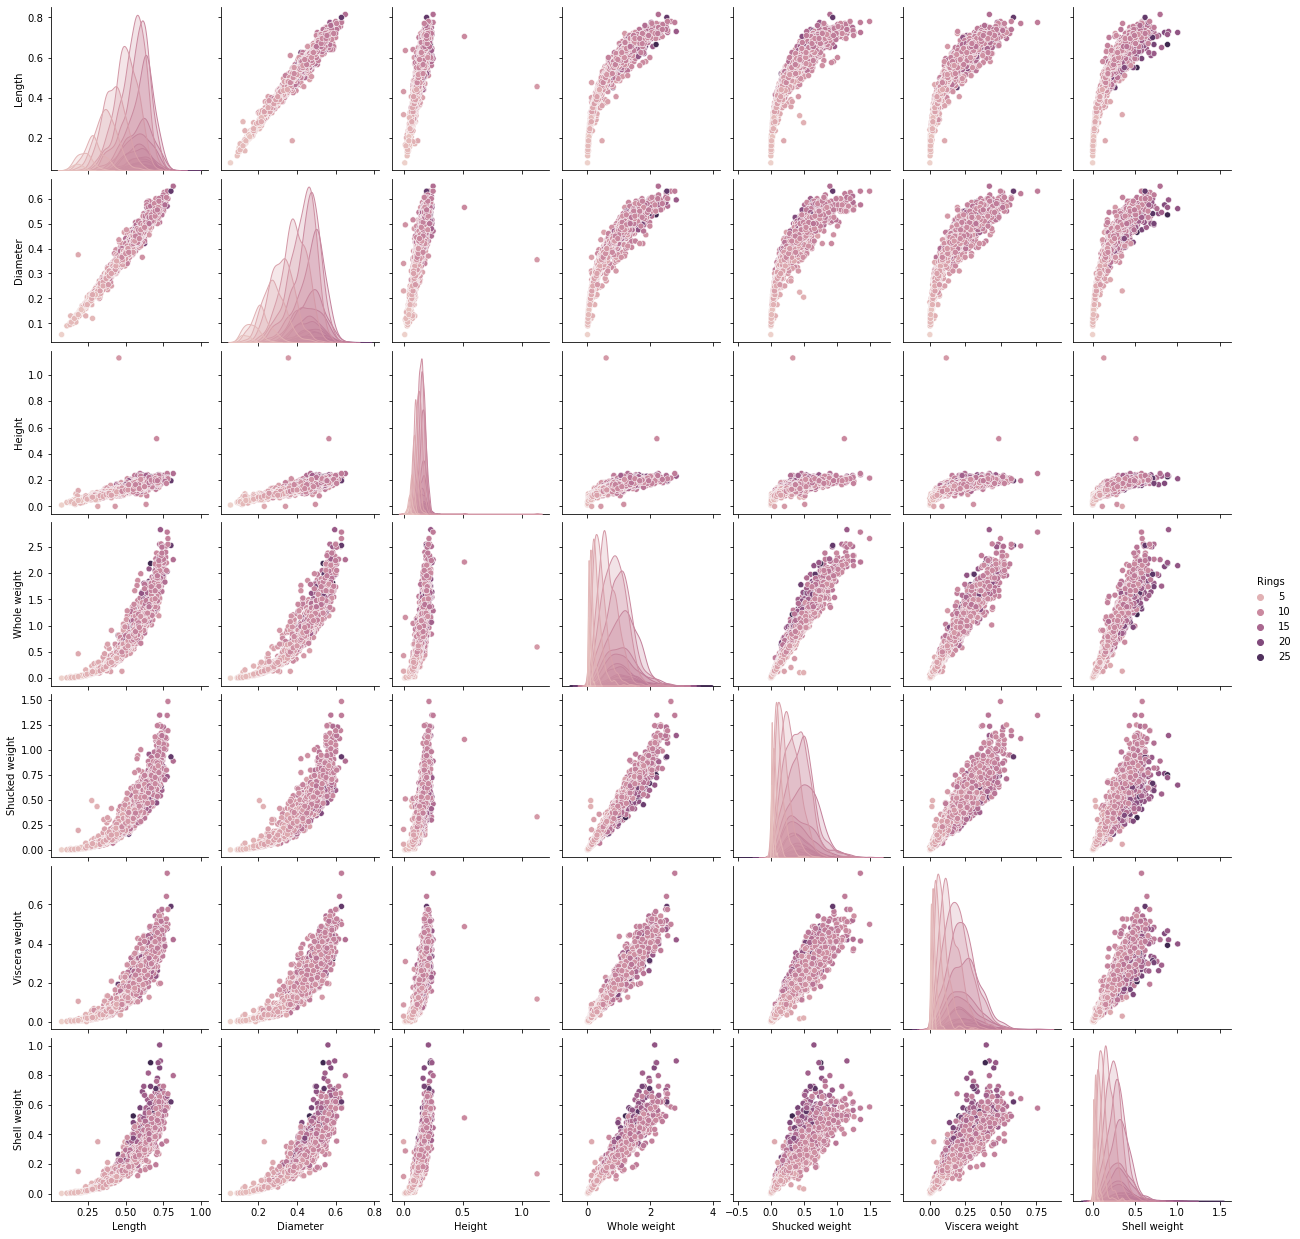

In [11]:
sns.pairplot(df,hue="Rings")

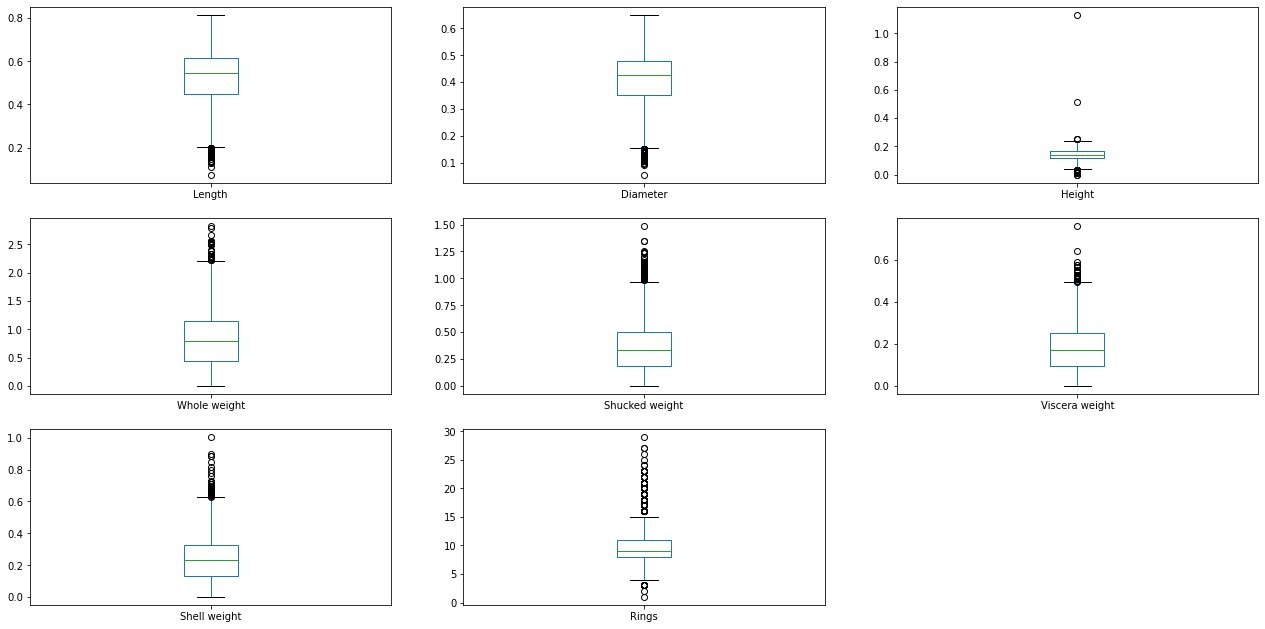

In [12]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, legend=False, figsize=(22,11))
plt.show()

We can observe that every column is having Outliers so we will try to remove it in further steps.
For determining the dimension of the abalone the height length and diameter are main.

<AxesSubplot:xlabel='Length'>

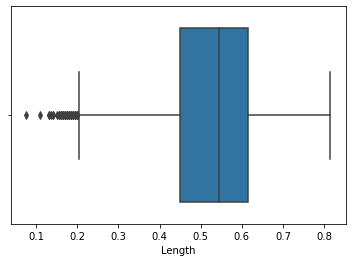

In [13]:
sns.boxplot(df["Length"])

<AxesSubplot:xlabel='Diameter'>

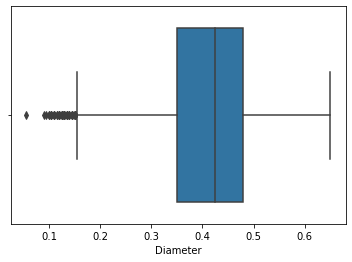

In [14]:
sns.boxplot(df["Diameter"])

<AxesSubplot:xlabel='Height'>

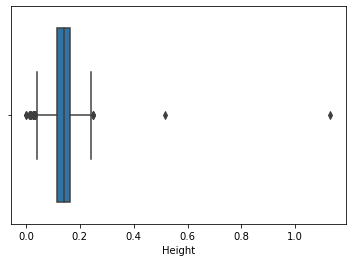

In [15]:
sns.boxplot(df["Height"])

To see the Height distribution clearly we will remove the outlier in the height column

# Outlier Removal

In [16]:
df=df[df["Height"]<0.4]

<AxesSubplot:xlabel='Height'>

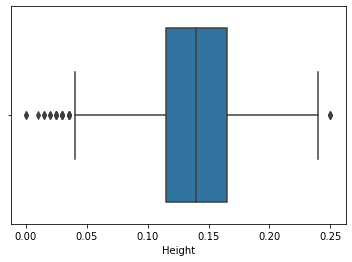

In [17]:
sns.boxplot(df["Height"])

<AxesSubplot:xlabel='Length'>

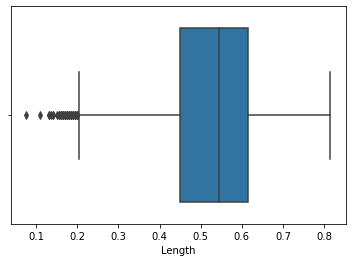

In [18]:
sns.boxplot(df["Length"])

<AxesSubplot:xlabel='Diameter'>

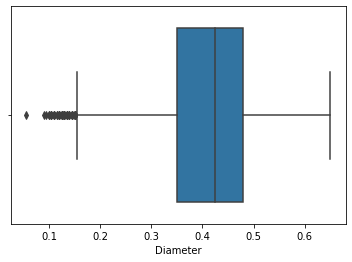

In [19]:
sns.boxplot(df["Diameter"])

Now the Length Diameter and Height distributions are clear.Rest all the Outliers are near to the whiskers so they are not Outliers

In [20]:
df.shape

(4175, 9)

In [21]:
3/4178*100

0.07180469123982766

Less than 1% data is lost 

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

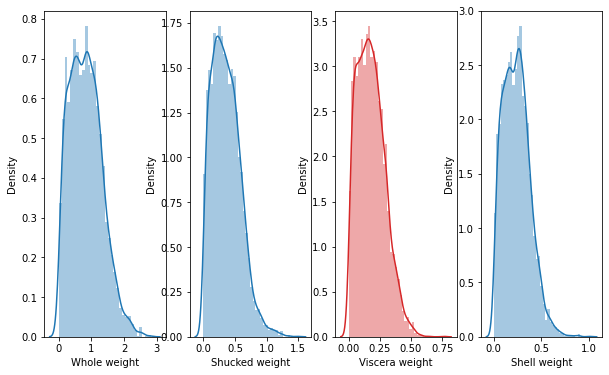

In [22]:
plt.figure(figsize=(10, 6))

colors = sns.color_palette()

rows = 1
cols = 4
i = 0

i += 1
plt.subplot(rows, cols, i)
sns.distplot(df['Whole weight'])
    
i += 1
plt.subplot(rows, cols, i)
sns.distplot(df['Shucked weight'])

i += 1
plt.subplot(rows, cols, i)
sns.distplot(df['Viscera weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
sns.distplot(df['Shell weight'], color=colors[i % cols])

We can observe a continous distribution plot for the weight category. However their is skewness in Whole Weight and Shell Weight

<AxesSubplot:xlabel='Sex', ylabel='count'>

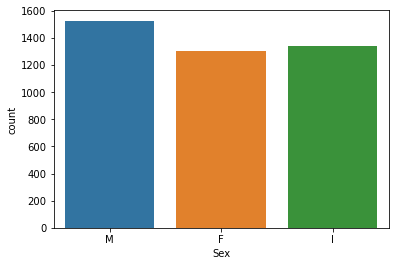

In [23]:
sns.countplot(df["Sex"])

In [24]:
cor=df.corr()
cor

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986804,0.899834,0.925372,0.898184,0.903091,0.897648,0.556827
Diameter,0.986804,1.000000,0.906086,0.925537,0.893385,0.899768,0.905271,0.574792
Height,0.899834,0.906086,1.000000,0.887712,0.836400,0.865710,0.888980,0.609634
Whole weight,0.925372,0.925537,0.887712,1.000000,0.969386,0.966311,0.955385,0.540859
Shucked weight,0.898184,0.893385,0.836400,0.969386,1.000000,0.931868,0.882681,0.421442
Viscera weight,0.903091,0.899768,0.865710,0.966311,0.931868,1.000000,0.907603,0.504234
Shell weight,0.897648,0.905271,0.888980,0.955385,0.882681,0.907603,1.000000,0.627815
Rings,0.556827,0.574792,0.609634,0.540859,0.421442,0.504234,0.627815,1.000000


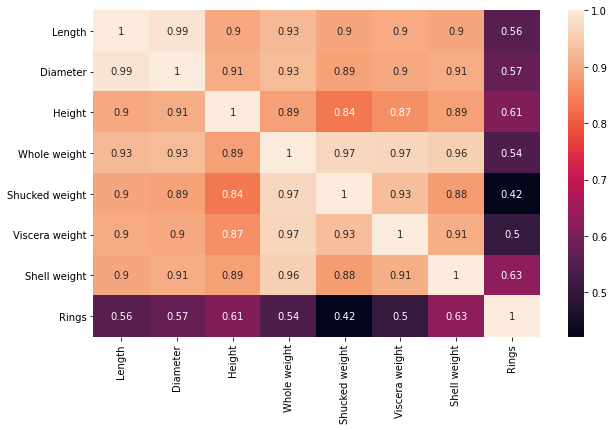

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True)
plt.show()

In [26]:
cor["Rings"].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627815
Height            0.609634
Diameter          0.574792
Length            0.556827
Whole weight      0.540859
Viscera weight    0.504234
Shucked weight    0.421442
Name: Rings, dtype: float64

On analyzing the correlation between the columns we observed that every column is related to the target variable.

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

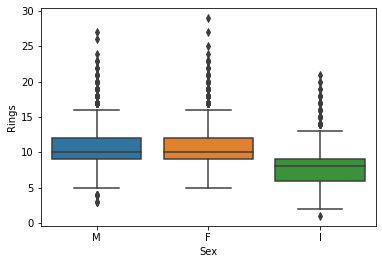

In [27]:
sns.boxplot(data=df,x="Sex",y="Rings")

<AxesSubplot:xlabel='Sex', ylabel='Height'>

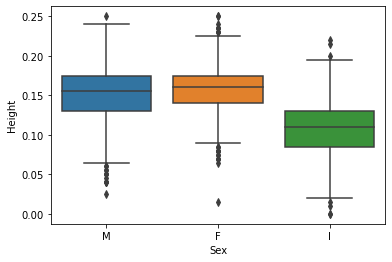

In [28]:
sns.boxplot(data=df,x="Sex",y="Height")

<AxesSubplot:xlabel='Sex', ylabel='Shell weight'>

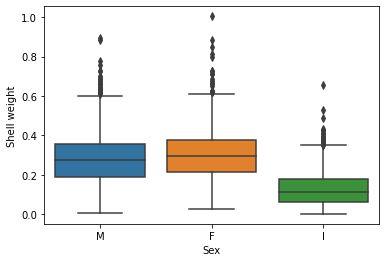

In [29]:
sns.boxplot(data=df,x="Sex",y="Shell weight")

<AxesSubplot:xlabel='Sex', ylabel='Length'>

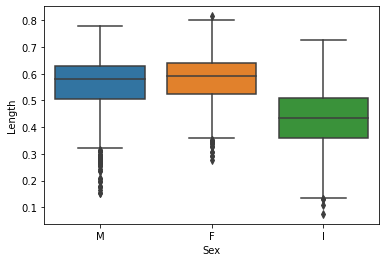

In [30]:
sns.boxplot(data=df,x="Sex",y="Length")

We can observe from the above analysis that sex has impact on the feature attributes. We can see that the infant shows lower mean of feature attributes i.e independent columns in comparison to the Male and Female Abalones.

<Figure size 1440x360 with 0 Axes>

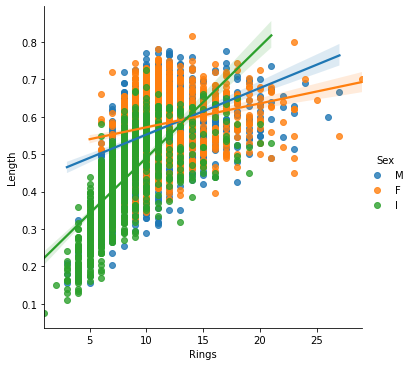

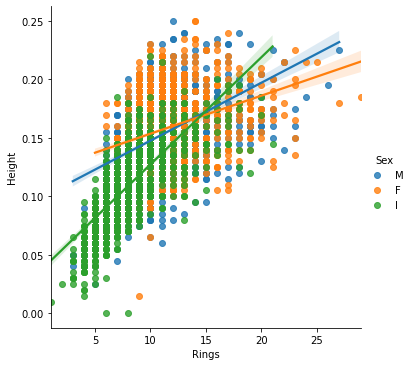

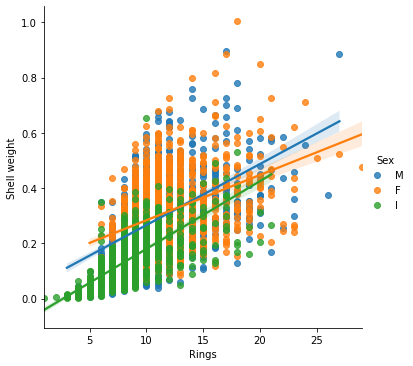

In [31]:
#This is a linear model plot.
plt.figure(figsize=(20, 5))
sns.lmplot(data=df, x='Rings', y='Length', hue='Sex',fit_reg=True)
sns.lmplot(data=df, x='Rings', y='Height', hue='Sex',fit_reg=True)
sns.lmplot(data=df, x='Rings', y='Shell weight', hue='Sex',fit_reg=True)

We can observe that their is no significant difference in the size and weight of the male/female abalones.
We can also see that their is a linear relationship between the independent variable and target varibale.

In [32]:
df["Rings"].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

We can see that their is maximum of 29 rings in an abalone and minimum of 1.

# Creating train_test_split

In [33]:
x=df.drop(["Rings","Sex"],axis=1)
y=df["Rings"]

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=69)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor

[ -0.81437208   9.38913256  24.31367896  10.36239279 -20.87030948
 -10.22140158   4.99256257]


Text(0, 0.5, 'Predicted Values')

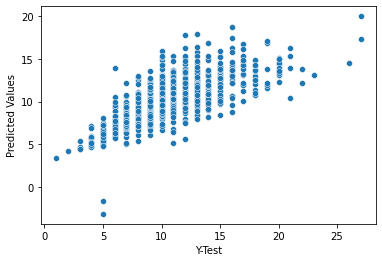

In [45]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.coef_)
predlr=lr.predict(x_test)
sns.scatterplot(y_test,predlr)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")

[  2.86219542   6.38924914  10.99324102   7.38913767 -17.39138601
  -5.42971715   8.8598185 ]


Text(0, 0.5, 'Predicted Values')

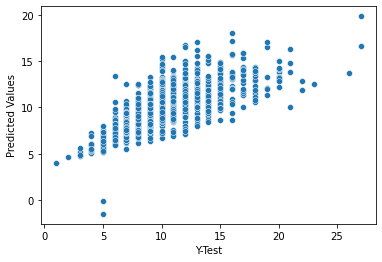

In [61]:
r=Ridge()
r.fit(x_train,y_train)
print(r.coef_)
predr=r.predict(x_test)
sns.scatterplot(y_test,predr)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")

[0. 0. 0. 0. 0. 0. 0.]


Text(0, 0.5, 'Predcited Values')

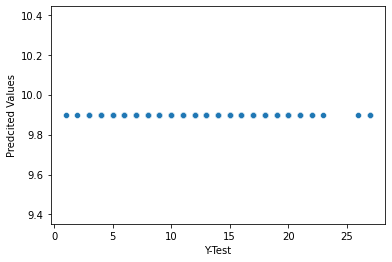

In [65]:
l=Lasso()
l.fit(x_train,y_train)
print(l.coef_)
predl=l.predict(x_test)
sns.scatterplot(y_test,predl)
plt.xlabel("Y-Test")
plt.ylabel("Predcited Values")

[0.         0.         0.         0.49803983 0.         0.
 0.        ]


Text(0, 0.5, 'Predcited Values')

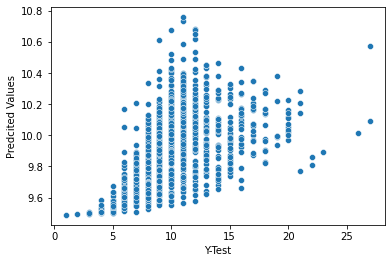

In [66]:
e=ElasticNet()
e.fit(x_train,y_train)
print(e.coef_)
prede=e.predict(x_test)
sns.scatterplot(y_test,prede)
plt.xlabel("Y-Test")
plt.ylabel("Predcited Values")

Text(0, 0.5, 'Predcited Values')

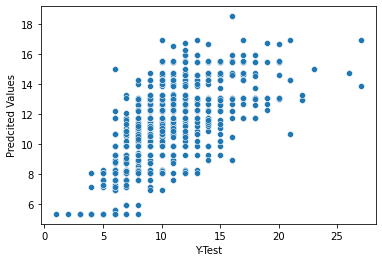

In [69]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
sns.scatterplot(y_test,predada)
plt.xlabel("Y-Test")
plt.ylabel("Predcited Values")

# Metrics Evaluation

In [43]:
import sklearn.metrics as metrics

In [46]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predlr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predlr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predlr))))

MAE: 1.6311895122406852
MSE: 4.9976636144159245
RMSE: 2.235545484756668


In [47]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predr))))

MAE: 1.6537905143890257
MSE: 5.1008989137459455
RMSE: 2.25851697220675


In [48]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predl)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predl)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predl))))

MAE: 2.3851593956844432
MSE: 10.711916743674529
RMSE: 3.272906467297


In [49]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, prede)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, prede)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, prede))))

MAE: 2.2843724352990193
MSE: 9.95469175544576
RMSE: 3.1551056647037607


In [50]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predada)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predada)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predada))))

MAE: 2.3720616379670614
MSE: 7.94908681281105
RMSE: 2.8194124942638403


## Checking cross validation score 

In [51]:
# cross validation score for linear regression

scores = cross_val_score(lr, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
    
print("Scores: ", scores)
print("Mean: ", scores.mean())

Scores:  [-4.83586248 -4.83492328 -5.06283129 -5.28611055 -4.41889708 -5.03072469
 -4.72913242 -5.01388378 -4.63935781 -4.38033356]
Mean:  -4.823205694263512


In [52]:
# cross validation score for Ridge regression

scores = cross_val_score(r, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
    
print("Scores: ", scores)
print("Mean: ", scores.mean())

Scores:  [-4.92912324 -4.86518309 -5.13676066 -5.54966637 -4.52462736 -5.05293974
 -4.68076388 -5.12406345 -4.71128194 -4.37562261]
Mean:  -4.89500323344814


In [53]:
# cross validation score for lasso regression

scores = cross_val_score(l, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
    
print("Scores: ", scores)
print("Mean: ", scores.mean())

Scores:  [-10.97705251  -9.66057827 -10.62961368 -11.19571822  -8.51847784
 -10.91720217  -9.60396483 -10.92345911 -10.93312721  -9.31271134]
Mean:  -10.267190518212107


In [54]:
# cross validation score for elastic net

scores = cross_val_score(e, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
    
print("Scores: ", scores)
print("Mean: ", scores.mean())

Scores:  [-10.09627792  -8.93954812  -9.77114166 -10.40259545  -7.78855296
 -10.02218394  -8.85934168 -10.13181394 -10.07057697  -8.53962294]
Mean:  -9.46216555781883


In [55]:
# cross validation score for ada boost regressor

scores = cross_val_score(ada, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
    
print("Scores: ", scores)
print("Mean: ", scores.mean())

Scores:  [-7.66470016 -8.09719579 -8.39058507 -8.36340742 -7.46005195 -8.38550815
 -6.62243148 -6.98853093 -6.52564592 -7.7279944 ]
Mean:  -7.622605126281407


We can see Linear Regression perform well.

## Prediction using user input 

In [56]:
x_new = np.array([[0.455, 0.365, 0.095, 0.5140, 0.2245, 0.1010, 0.150]])
print(x_new.shape)

(1, 7)


In [59]:
pred = lr.predict(x_new)

In [60]:
print("prediction: {}".format(pred))

prediction: [8.44115472]
